<img src="fotos/logo_uach.png" alt="UACh" style="height: 200px; display: block;margin-left: auto;margin-right: auto;"/>

# Tarea 3: Ventaneo de señal de audio
+ Cristóbal González (cristobal dot gonzalez04 at alumnos dot uach dot cl)
+ Joaquin Toledo (joaquin dot toledo01 at alumnos dot uach dot cl)

### Índice
+ [1. Introducción](#id1)
+ [2. Uso del ventaneo](#id2)
+ [3. Propiedades de ventaneo](#id3)
   - [3.1 Rectangular](#id3.1)
   - [3.2 Bartlett (triangular)](#id3.2)
   - [3.3 Hann](#id3.3)
   - [3.4 Hamming](#id3.4)
   - [3.5 Blackman](#id3.5)

## 1. Introducción <a name='id1'></a>

Los ventaneos fueron introducidos por Duffin y Schaeffer en el año 1952 para el estudio de las series de Fourier no armónicas. La idea principal es representar una señal mediante sus proyecciones sobre una secuencia de elementos , sin restringirla a ser múltiplos de una frecuencia fundamental como en las series armónicas (tradicionales) de Fourier. Se puede ver fácilmente que el conjunto es muy sobrecompleto, en el sentido de que, por ejemplo, en un espacio, puede consistir en una secuencia de elementos o funciones que son mayores en número que una base.

## 1. Uso del ventaneo <a name='id2'></a>

El ventaneo se usa principalmente para la transformación de sistemas IIR en tiempo continuo en sistemas IIR de tiempo discreto. Por otro lado, también se usan para el diseño de filtros FIR. Las técnicas de diseño de filtros FIR se basan en aproximar directamente la respuesta en frecuencia o la respuesta al impulso deseadas del sistema en tiempo discreto.

El método más simple de diseño de filtros FIR se denomina método de enventanado. Este método parte generalmente de una respuesta en frecuencia deseada ideal que se puede representar como:

$$
H_d (e^{j\omega})= \sum_{n=-\infty}^{\infty} h_d[n] \cdot e^{-j\omega n} , 
$$

siendo $h_d[n]$ la correspondiente secuencia de respuesta al impulso, que se puede expresar en función de $H_d(e^{jω})$ como:

$$
h_d [n] = \frac{1}{2\pi} \int_{-\pi}^{\pi} H_d(e^{j\omega})e^{j\omega n} d\omega.
$$

Los sistemas que se definen de forma idealizada mediante respuestas en frecuencia constantes por tramos o suaves por tramos, con discontinuidades en los límites de las bandas, pueden presentar una respuesta al impulso no causal e infinitamente larga. Para obtener una aproximación FIR causal de estos sistemas, se suele truncar la respuesta al impulso ideal.

+ En la Ecuación 1 se puede ver como el desarrollo en serie de Fourier de la respuesta en frecuencia periódica $H_d(e^{jω})$, donde los valores de la secuencia $h_d[n]$ actúan como coeficientes del desarrollo en serie de Fourier.

+ La aproximación de un filtro ideal mediante el truncamiento de la respuesta al impulso ideal es comparable al tema de la convergencia del desarrollo en serie de Fourier, un concepto que ha sido ampliamente estudiado en el campo de la teoría de señales y sistemas.


## 3. Propiedades de ventaneo <a name='id3'></a>

#### 3.1 Rectangular <a name='id3.1'></a>

#### 3.2 Bartlett (triangular) <a name='id3.2'></a>

#### 3.3 Hann <a name='id3.3'></a>

#### 3.4 Hamming <a name='id3.4'></a>

#### 3.5 Blackman <a name='id3.5'></a>


Las ventanas de Bartlett, Hann, Hamming y Blackman deben todas su nombre a sus descubridores. La ventana de Hanning se debe a Julius von Hann, un meteorólogo austríaco, y se denomina a veces ventana de Hann. El término “hanning” fue utilizado por Blackman y Tukey (1958) para describir la operación de la aplicación de esta ventana a una señal y se ha convertido en el nombre más ampliamente utilizado de esta ventana, con preferencias variadas sobre la utilización del término “Hanning” o “hanning”. 

Hay alguna ligera variación en la definición de las ventanas de Barlett y Hann. Tal como las hemos definido, w[0] = w[M] = 0, por lo que sería razonable afirmar que, con esta definición, la longitud de la ventana es realmente de M−1 muestras. Otras definiciones de las ventanas de Barlett y Hann se relacionan con la nuestra mediante un desplazamiento de una muestra y una redefinición de la longitud
de la ventana.

# Aqui Empieza Codigo

In [1]:
import librosa as lib
import matplotlib.pyplot as plt
import numpy as np

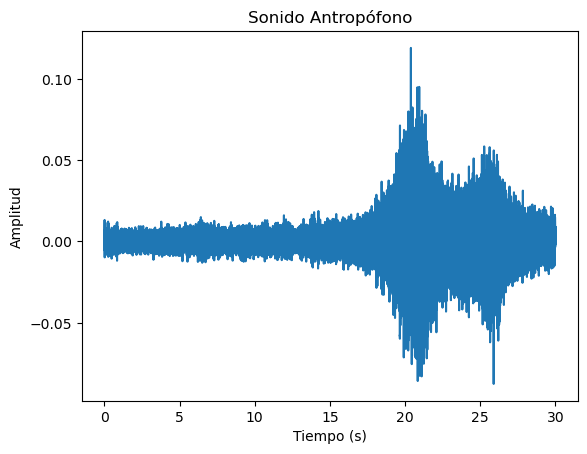

In [2]:
# Sonido Antropofónico
sig1, fs = lib.load('audios/sound_ant.wav', sr=48000)

#Duración Señal 1
dur_1 = sig1.size/fs

#Vector Tiempo
t = np.linspace(0, dur_1, sig1.size)

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Sonido Antropófono')
plt.plot(t, sig1);

In [3]:
def mat_frames(x,len_f,overlap):
    x=x.tolist()
    # Numero de ventanas (Rounded)
    n_frames=round(len(x)/(len_f-(len_f*overlap)))
    # Definimos array
    matriz_f=[]

    for i in range(n_frames):
        #Definimos los frames iterados
        frame=x[i*round(len_f*overlap):i*round(len_f*overlap)+len_f]
        while len(frame)<len_f:
            frame.append(0)
        matriz_f.append(frame)
        
    matf=np.array(matriz_f)
    return matf